In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
df_polkadot=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Polkadot.csv")
print(df_polkadot.head())

   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Polkadot    DOT  2020-08-21 23:59:59  3.090093  2.730919  2.896923   
1    2  Polkadot    DOT  2020-08-22 23:59:59  4.510613  2.816762  2.878570   
2    3  Polkadot    DOT  2020-08-23 23:59:59  4.487058  3.716271  4.487058   
3    4  Polkadot    DOT  2020-08-24 23:59:59  4.783158  3.812670  3.987413   
4    5  Polkadot    DOT  2020-08-25 23:59:59  5.760775  4.501223  4.584953   

      Close        Volume  Marketcap  
0  2.875028  4.931314e+07        0.0  
1  4.484690  4.858011e+08        0.0  
2  3.967066  3.207495e+08        0.0  
3  4.602614  4.076902e+08        0.0  
4  5.523393  8.988475e+08        0.0  


In [4]:
df_polkadot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        320 non-null    int64  
 1   Name       320 non-null    object 
 2   Symbol     320 non-null    object 
 3   Date       320 non-null    object 
 4   High       320 non-null    float64
 5   Low        320 non-null    float64
 6   Open       320 non-null    float64
 7   Close      320 non-null    float64
 8   Volume     320 non-null    float64
 9   Marketcap  320 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 25.1+ KB


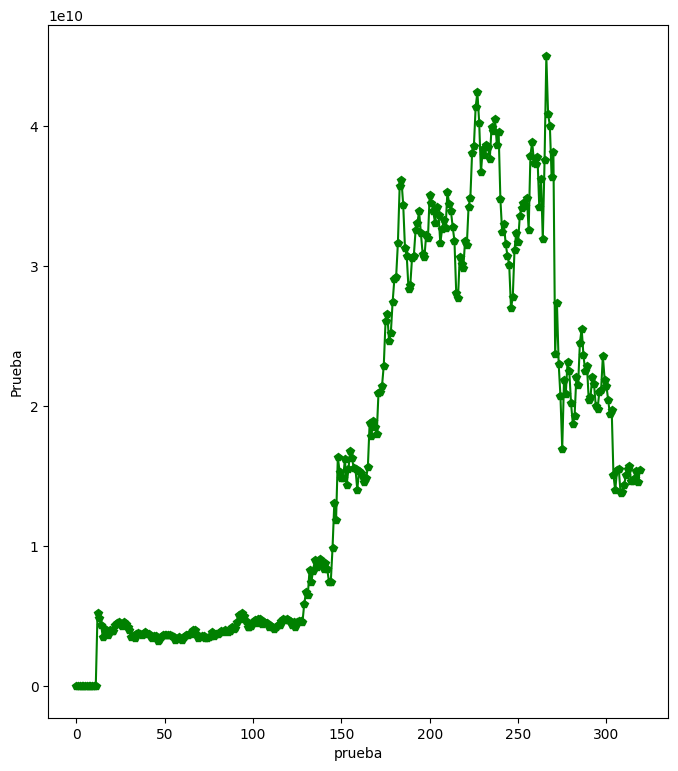

In [ ]:
'''
plt.figure(figsize=(8,9))
plt.plot(df_polkadot['Marketcap'], marker='p', linestyle='-', color='g')
plt.xlabel('prueba')
plt.ylabel('Prueba')
plt.show()
'''

In [5]:
df_polkadot.shape

(320, 10)

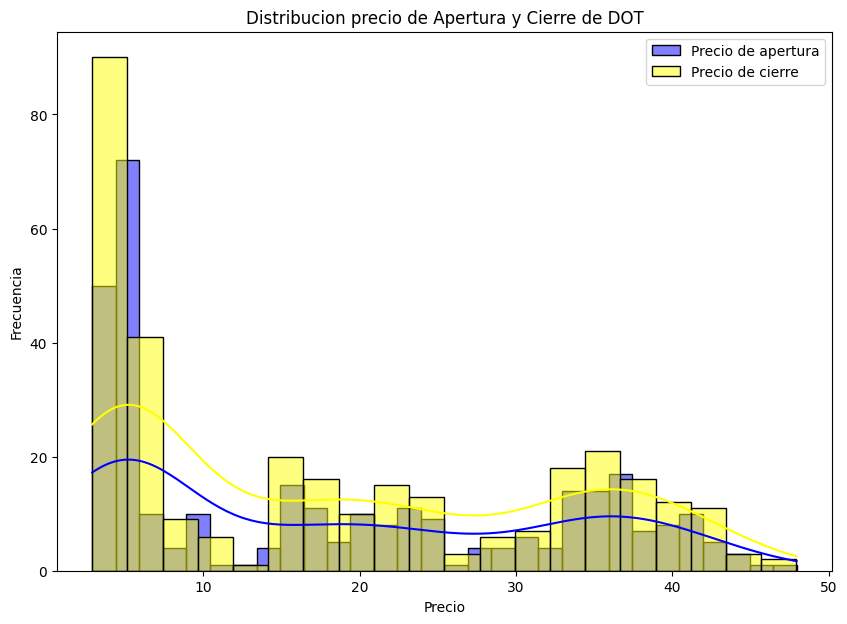

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(df_polkadot['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_polkadot['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de DOT')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

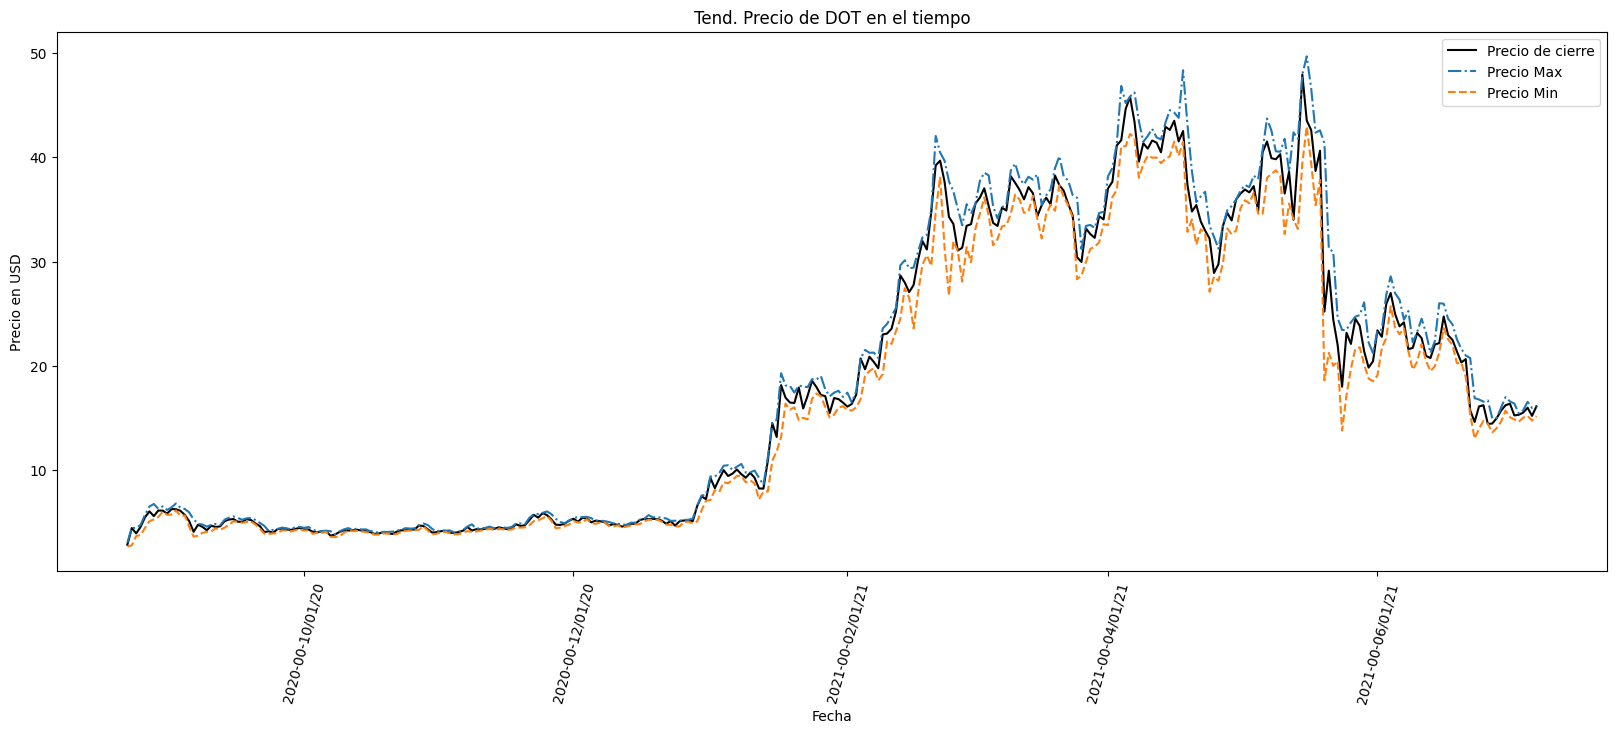

In [9]:
plt.figure(figsize=(20,7))
plt.plot (df_polkadot['Date'], df_polkadot ['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_polkadot ['Date'], df_polkadot['High'], label='Precio Max', linestyle='-.')
plt.plot(df_polkadot['Date'], df_polkadot['Low'], label='Precio Min', linestyle='--')
plt.title('Tend. Precio de DOT en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [8]:
df_polkadot['Date']= pd.to_datetime(df_polkadot['Date'])

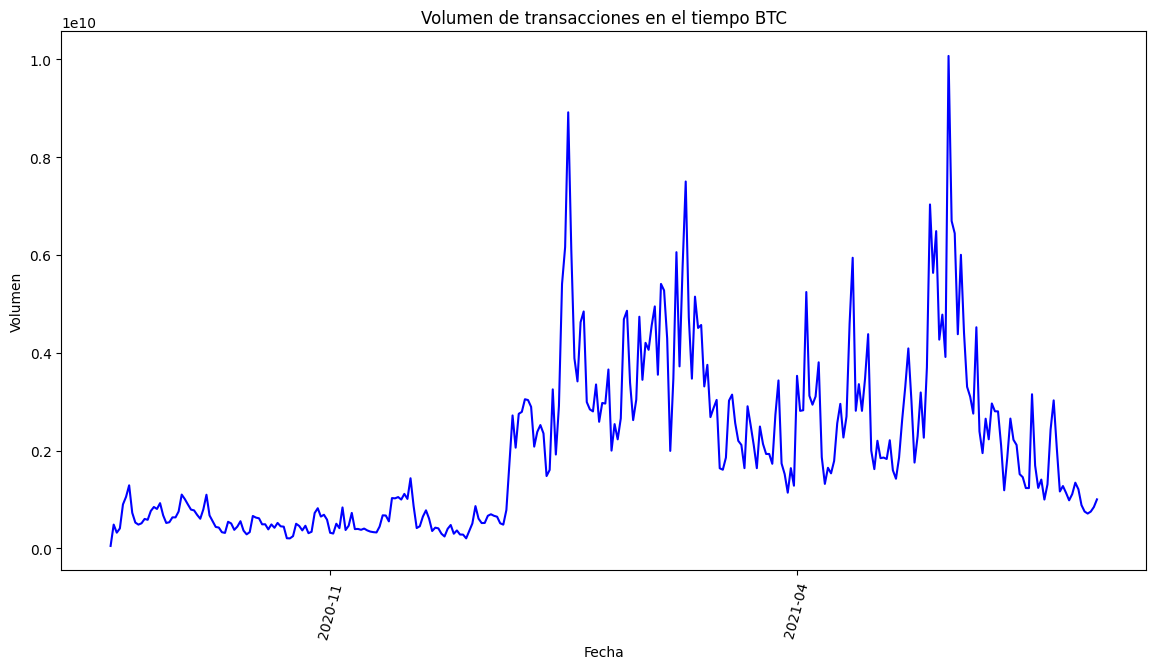

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df_polkadot['Date'], df_polkadot['Volume'], color='blue')
plt.title('Volumen de transacciones en el tiempo BTC')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [21]:
df_polkadot['Date']=pd.to_datetime(df_polkadot['Date'])

In [22]:
df_polkadot.set_index('Date',inplace=True)

In [23]:
ethereum_mensual = df_polkadot.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14752\475093768.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ethereum_mensual = df_polkadot.resample('M').agg({


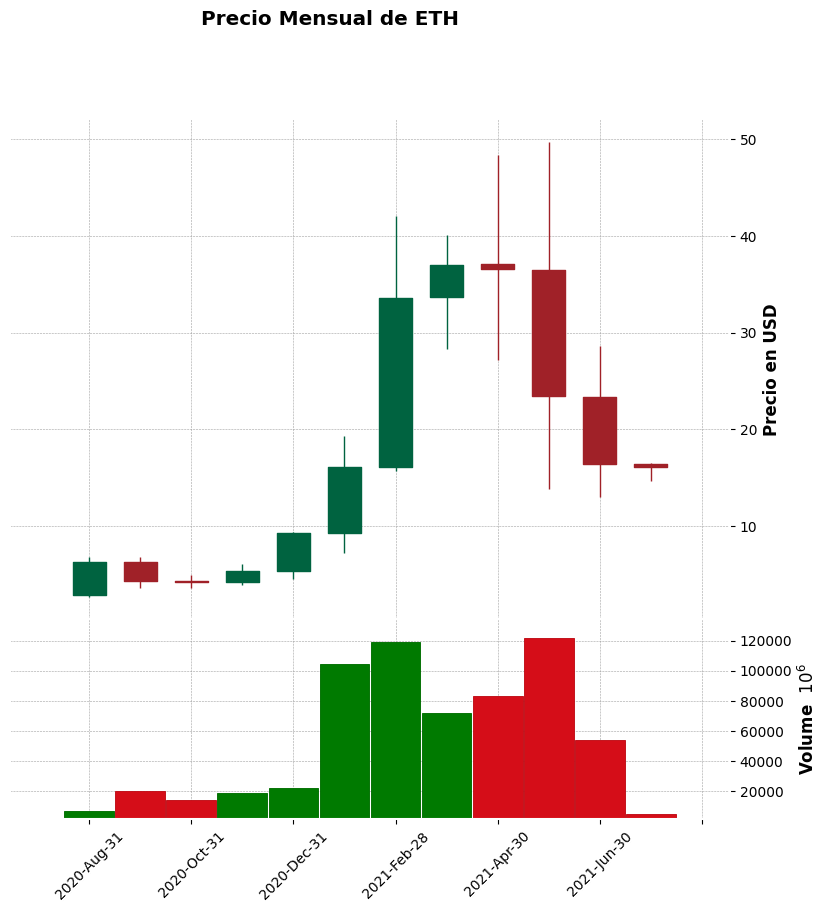

In [24]:
mpf.plot(ethereum_mensual, type='candle', style='charles',
         title='Precio Mensual de ETH',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))